In [1]:
!pip install kagglehub
!pip install kaggle
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install seaborn
import kagglehub
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Path to dataset files: /root/.cache/kagglehub/datasets/datamunge/sign-language-mnist/versions/1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
model_01.h5  model_01.keras


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 144 variables whereas the saved optimizer has 286 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


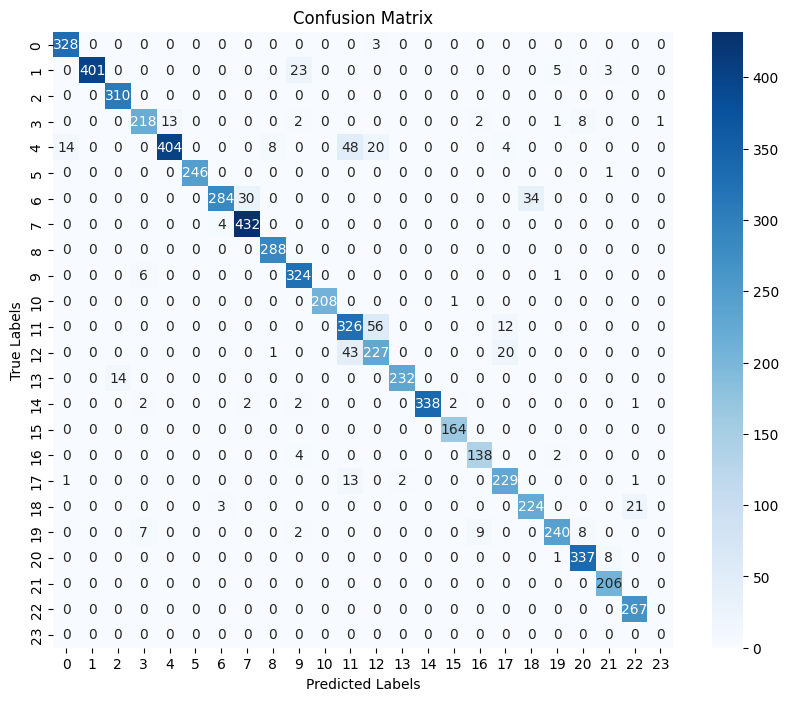

Test Accuracy: 0.9314
F1 Score: 0.9315


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


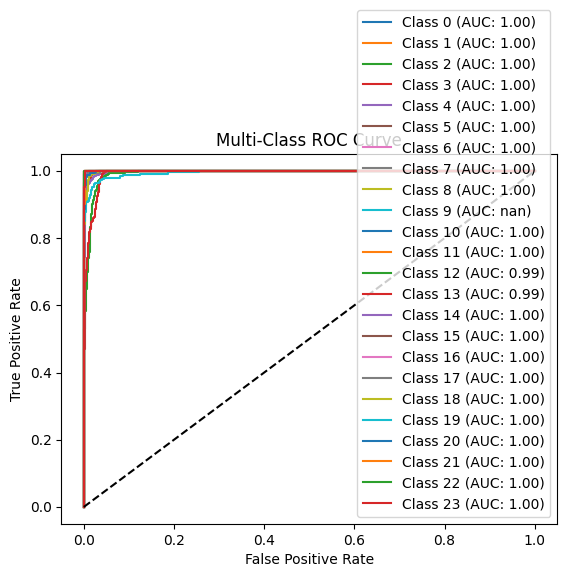

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       331
           1       1.00      0.93      0.96       432
           2       0.96      1.00      0.98       310
           3       0.94      0.89      0.91       245
           4       0.97      0.81      0.88       498
           5       1.00      1.00      1.00       247
           6       0.98      0.82      0.89       348
           7       0.93      0.99      0.96       436
           8       0.97      1.00      0.98       288
           9       0.91      0.98      0.94       331
          10       1.00      1.00      1.00       209
          11       0.76      0.83      0.79       394
          12       0.74      0.78      0.76       291
          13       0.99      0.94      0.97       246
          14       1.00      0.97      0.99       347
          15       0.98      1.00      0.99       164
          16       0.93      0.96      0.94       144
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns

# Constants
BATCH_SIZE = 32
IMG_HEIGHT = 96
IMG_WIDTH = 96
NUM_CLASSES = 24  # Exclude class 9

# Preprocessing functions
def preprocess_image(image, label):
    image = tf.reshape(image, [28, 28, 1])
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = tf.image.grayscale_to_rgb(image)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def load_dataset_from_dataframe(dataframe):
    labels = dataframe.iloc[:, 0].values
    images = dataframe.iloc[:, 1:].values.reshape(-1, 28, 28, 1)
    # Remove samples with label 9
    mask = (labels != 9) & (labels < NUM_CLASSES)
    labels = labels[mask]
    images = images[mask]
    labels = tf.keras.utils.to_categorical(labels, NUM_CLASSES)
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    dataset = dataset.map(preprocess_image)
    dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return dataset

# Download the dataset from Kaggle
path = kagglehub.dataset_download("datamunge/sign-language-mnist")
print("Path to dataset files:", path)

# Load training and testing data
train_data = pd.read_csv(f"{path}/sign_mnist_train.csv")
test_data = pd.read_csv(f"{path}/sign_mnist_test.csv")

from google.colab import drive
drive.mount('/content/drive')

models_folder = "/content/drive/My Drive/Colab Notebooks/AAI 521 - Group 7/Models"

!ls "{models_folder}"

# Prepare test dataset
test_dataset = load_dataset_from_dataframe(test_data)

# Load the model
model = tf.keras.models.load_model(models_folder+"/model_01.keras")

# Evaluate the model
y_test = []
y_pred = []
y_probs = []

for images, labels in test_dataset:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_probs.extend(preds)
    y_test.extend(np.argmax(labels.numpy(), axis=1))

# Metrics calculation
y_test_onehot = label_binarize(y_test, classes=list(range(NUM_CLASSES)))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy and F1 Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Test Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC and AUC for multi-class
y_probs = np.array(y_probs)
roc_auc_dict = {}
for i in range(NUM_CLASSES):
    fpr, tpr, _ = roc_curve(y_test_onehot[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_dict[i] = roc_auc
    plt.plot(fpr, tpr, label=f'Class {i} (AUC: {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()



# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(NUM_CLASSES)]))


